In [5]:
from dataloader import TestCase
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import step_predictor
import direction_predictor
import math
test_case = TestCase("test_case0")

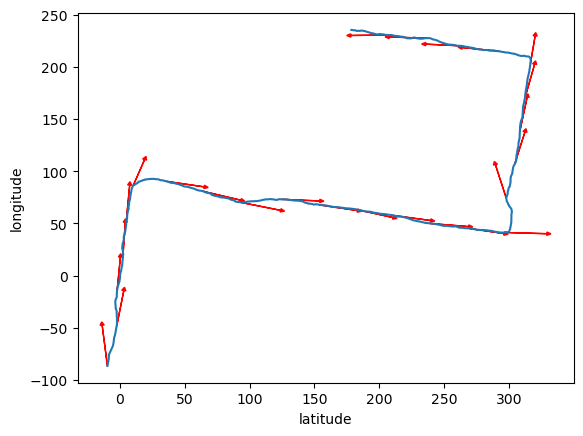

In [6]:
model = step_predictor.step_process_regression(test_case,'l',write = False)
direction_pred = direction_predictor.predict_direction(test_case,butter_Wn=0.01)
test_case.draw_route()

c:\Users\17903\MiniConda3\envs\pdr\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


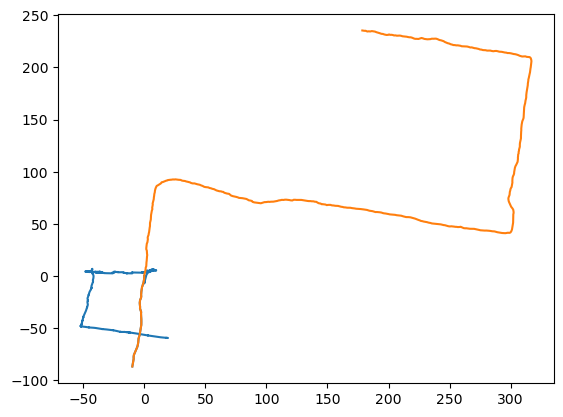

In [7]:
filtered_a = step_predictor.filter(10,test_case.a_mag)
num_peak_3 = signal.find_peaks(filtered_a, distance=20)
mean_peak = sum(filtered_a[num_peak_3[0]])/len(num_peak_3[0])
real_peak = num_peak_3[0][np.where(filtered_a[num_peak_3[0]] > mean_peak*0.8)]

test_begin = len(test_case.x)-1
step_test_begin = 0
while test_case.time[real_peak[step_test_begin]] < test_case.time_location[test_begin]:
    step_test_begin += 1


# 把前百分之十的时间位置先记录下来
time_list = []
x_list = []
y_list = []

for i in range(0,len(test_case.x)):
    time_list.append(test_case.time_location[i])
    x_list.append(test_case.x[i])
    y_list.append(test_case.y[i])


begin_position = [test_case.x[test_begin],test_case.y[test_begin]]

for i in range(step_test_begin,len(real_peak)):
    f = 1/( test_case.time[real_peak[i]] - test_case.time[real_peak[i-1]])
    sigma = np.var(filtered_a[real_peak[i-1]:real_peak[i]])
    
    step_pred = model.predict([[f,sigma]])[0]
    # print(step_pred)
    
    if i == len(real_peak)-1:
        mean_direction = np.mean(direction_pred[real_peak[i-1]:-1])
    else:
        mean_direction = np.mean(direction_pred[real_peak[i-1]:real_peak[i]])
    
    dx = step_pred*math.cos(mean_direction*math.pi/180)
    dy = step_pred*math.sin(mean_direction*math.pi/180)
    
    time_list.append(test_case.time[real_peak[i]])
    x_list.append(dx + x_list[-1])
    y_list.append(dy + y_list[-1])
    # print(position_list[-1][0],position_list[-1][1])
# print(position_list)
plt.plot(x_list,y_list)
# print(len(x_list))
plt.plot(test_case.x_valid,test_case.y_valid)
# print(len(test_case.x_valid))
plt.show()